<a href="https://colab.research.google.com/github/VeronicaGarciaRio/TS/blob/main/AST_TP1_ultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings
from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime
import scipy.stats
import pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
file_path = '/content/per-capita-energy-use.csv'
df = pd.read_csv(file_path)
df.head()


,Entity,Code,Year,energy_consumption_per_capita
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290


In [ ]:
da = df[df['Entity'] == 'Argentina']
da.head()

,Entity,Code,Year,energy_consumption_per_capita
326,Argentina,ARG,1965,14896.737
327,Argentina,ARG,1966,15139.622
328,Argentina,ARG,1967,15337.348
329,Argentina,ARG,1968,15612.201
330,Argentina,ARG,1969,15887.447


In [ ]:
da = da[['Year','energy_consumption_per_capita']]
da.head()

,Year,energy_consumption_per_capita
326,1965,14896.737
327,1966,15139.622
328,1967,15337.348
329,1968,15612.201
330,1969,15887.447


In [ ]:
da.tail()

,Year,energy_consumption_per_capita
379,2018,22163.160
380,2019,20725.168
381,2020,19314.066
382,2021,21328.186
383,2022,21994.422


In [ ]:
da.dtypes


Year                               int64
energy_consumption_per_capita    float64
dtype: object

In [ ]:
#da = da.asfreq('A')
#da.dtypes


In [ ]:
da2=da.copy()

In [ ]:
#REEMPLAZO VALOR 2020 VER
da2.loc[da2['Year'] == 2020, 'energy_consumption_per_capita'] = 21026
da2.loc[da2['Year'] == 2002, 'energy_consumption_per_capita'] = 18250

In [ ]:
da2.tail()

,Year,energy_consumption_per_capita
379,2018,22163.160
380,2019,20725.168
381,2020,21026.000
382,2021,21328.186
383,2022,21994.422


In [ ]:
da.isna().sum()

Year                             0
energy_consumption_per_capita    0
dtype: int64

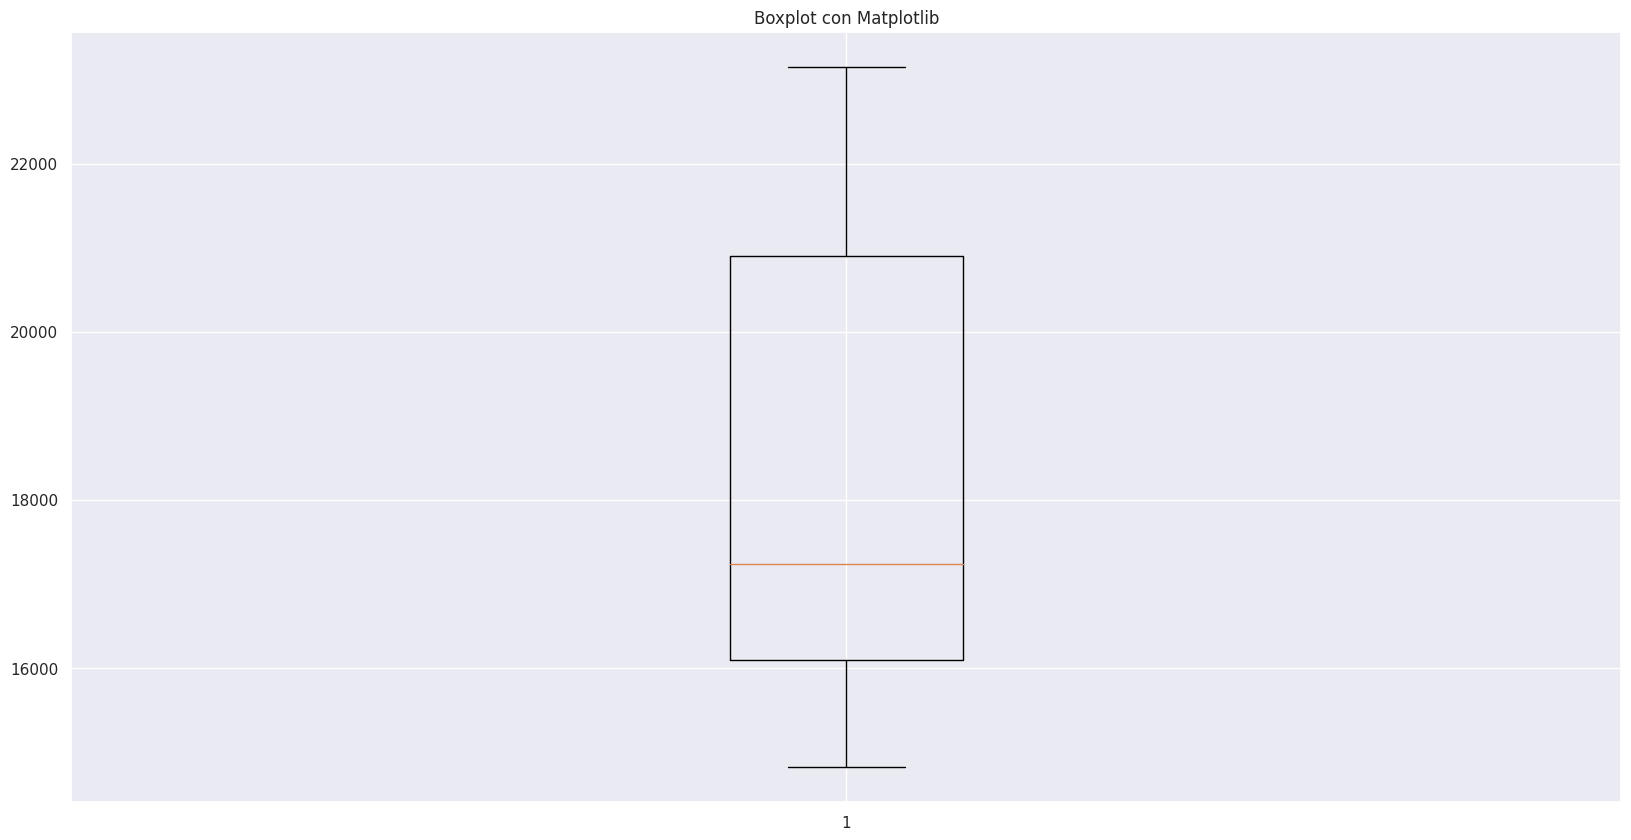

In [ ]:
plt.boxplot(da)
plt.title('Boxplot con Matplotlib')
plt.show()

In [ ]:
da.set_index('Year', inplace=True)
da.head()



,energy_consumption_per_capita
Year,
1965,14896.737
1966,15139.622
1967,15337.348
1968,15612.201
1969,15887.447


In [ ]:
da2.set_index('Year', inplace=True)
da2.head()

NameError: ignored

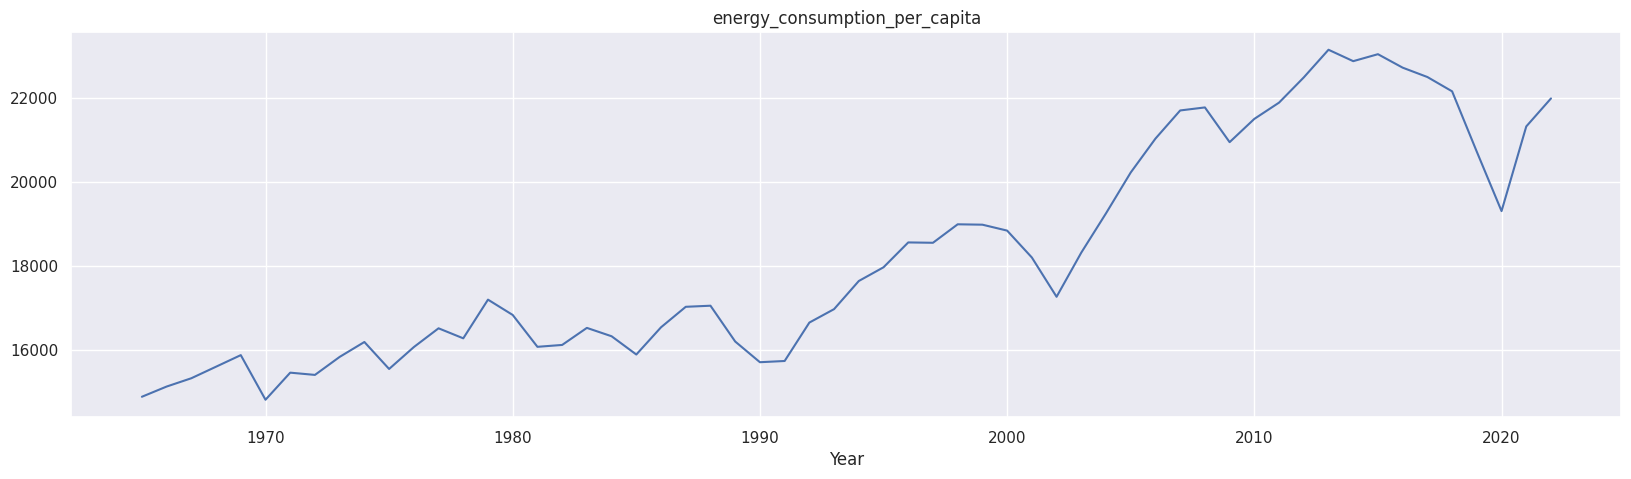

In [ ]:
da.energy_consumption_per_capita.plot(figsize=(20,5), title = "energy_consumption_per_capita")
plt.show()



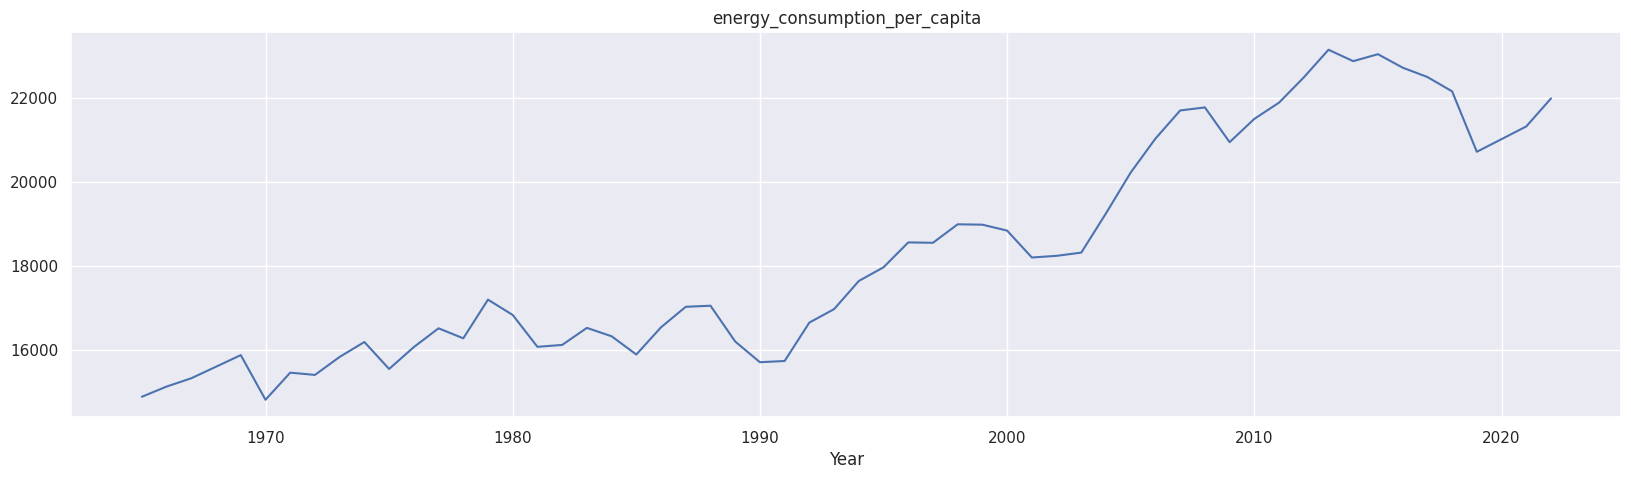

In [ ]:
da2.energy_consumption_per_capita.plot(figsize=(20,5), title = "energy_consumption_per_capita")
plt.show()

In [ ]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  #axes[2,1].set_xlabel('Lag')


  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie 1: energy_consumption_per_capita')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  #plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Repito grafico: energy_consumption_per_capita')
  #plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  #axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

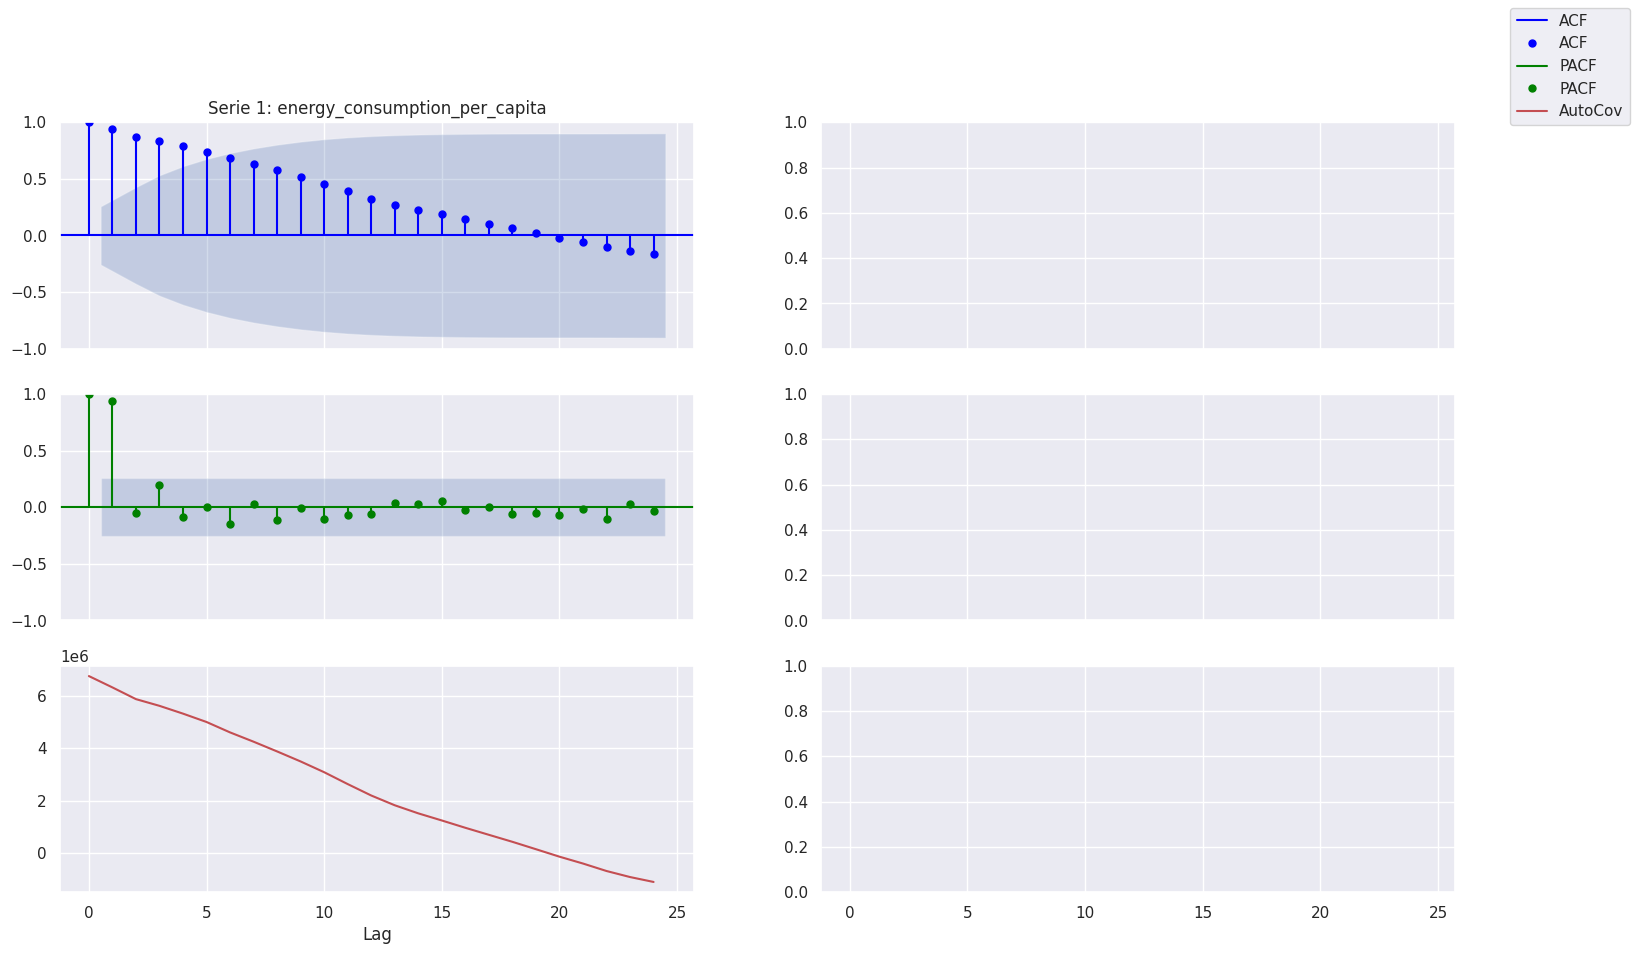

In [ ]:
# Grafica diferentes funciones de la serie
autocov_autocorr(da.energy_consumption_per_capita, da.energy_consumption_per_capita ,24)

De acuerdo a los graficos de FAC se trataria de una serie no estacionaria dado que decrece en forma lineal

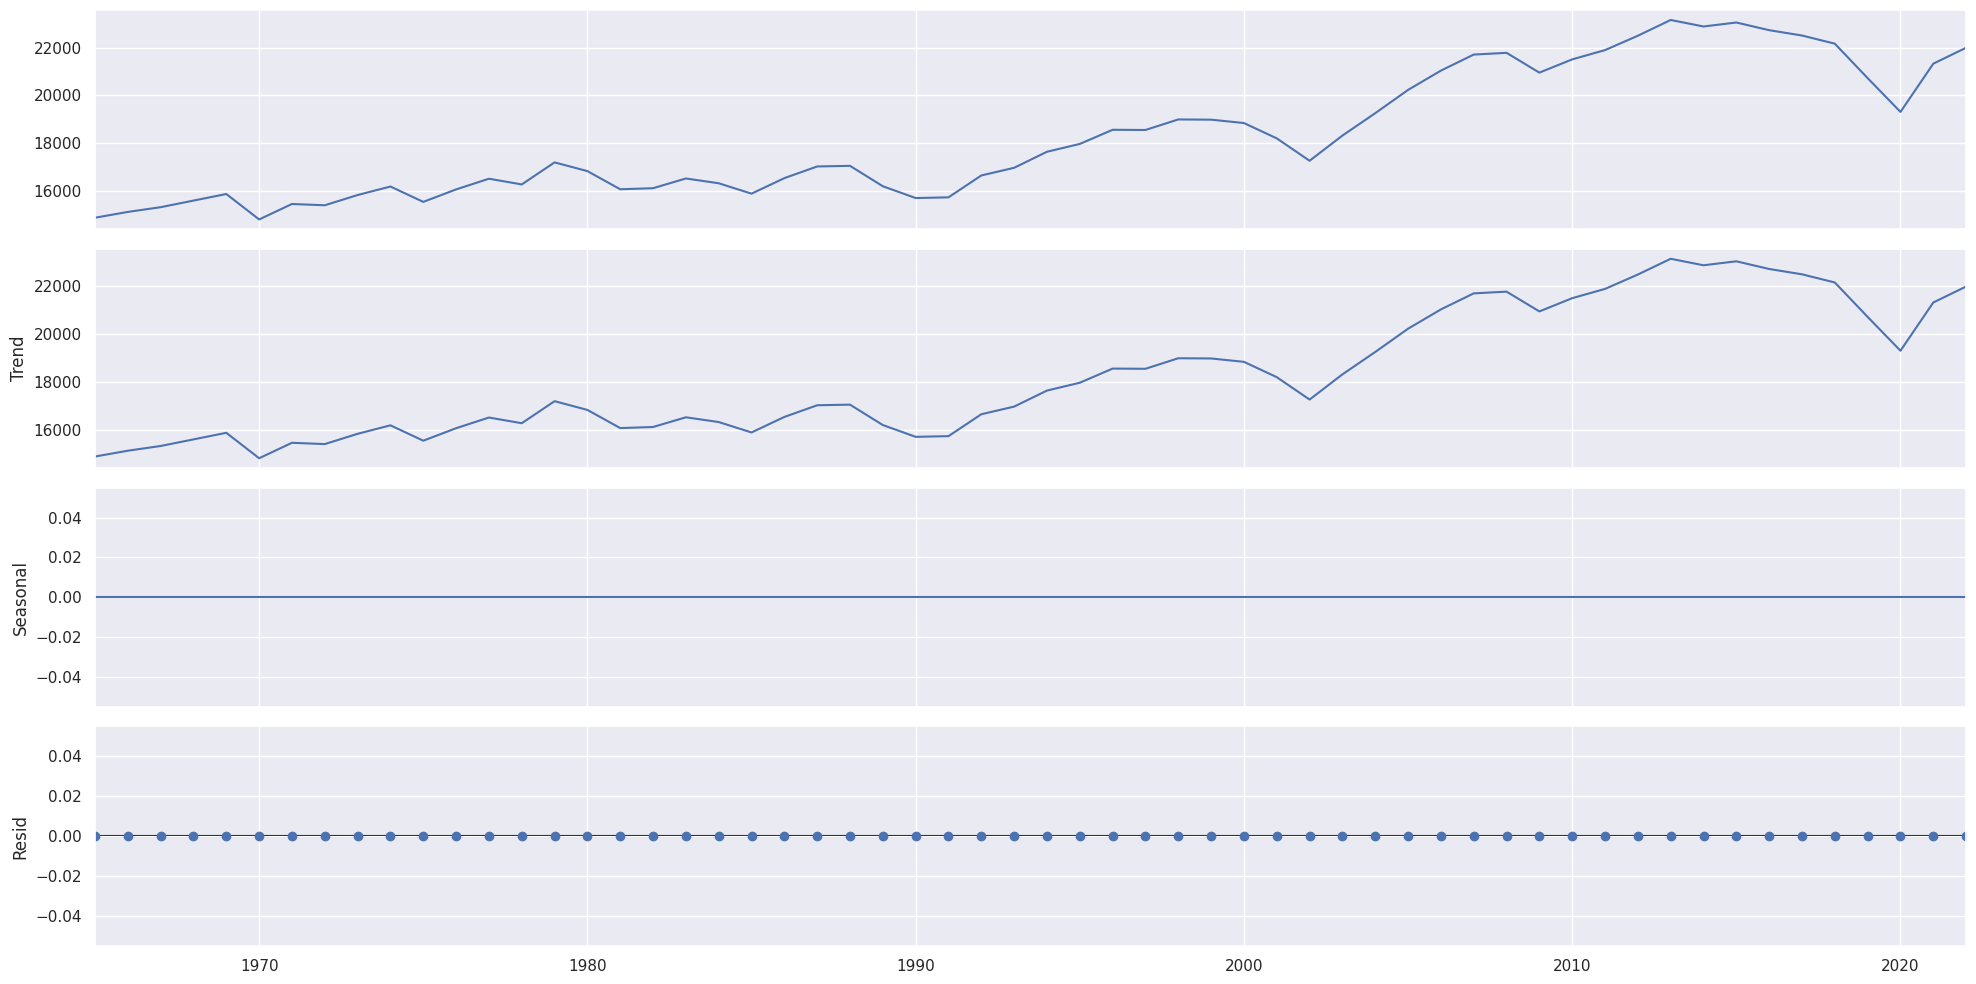

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive = seasonal_decompose(da, model = "adittive",period=1)
s_dec_additive.plot()
plt.show()


de acuerdo a la descomposicion de la serie apreciamos tendencia y estacionalidad

analisis de raices unitarias

In [ ]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [ ]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

SERIE ORIGINAL

In [ ]:
print_test_afd(da)

Estadistico ADF: -0.851679
p-valor: 0.803469
Valores criticos:
	1%: -3.555
	5%: -2.916
	10%: -2.596


In [ ]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(da, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(1.1647193711606758,
 0.9365790991428828,
 2,
 55,
 {'1%': -2.6075899173553716,
  '5%': -1.946808366641623,
  '10%': -1.612735648384673},
 732.2576206397222)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(da, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-0.8516785458578624,
 0.8034688198189792,
 2,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 733.0719055417333)

In [ ]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(da, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-2.915487248995459,
 0.1572604354490395,
 1,
 56,
 {'1%': -4.130261462053571,
  '5%': -3.4920297480867344,
  '10%': -3.1746004600947524},
 727.6492332956793)

In [ ]:
estacionario(da)

Estimado de número de diferencias con ADF test
1
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
1
Se debe realizar diferenciación (should_diff) ADF Test
(0.3336270226273974, True)


\Con una diferenciacion es suficiente para ser estacionaria

SERIE DIFERENCIADA

In [ ]:
X = da[['energy_consumption_per_capita' ]]
X_diff=X.copy()
da_diff=X_diff.diff(axis = 0, periods = 1)
da_diff.head()
da_diff.drop([1965], inplace=True)



In [ ]:
print_test_afd(da_diff)

Estadistico ADF: -5.391244
p-valor: 0.000004
Valores criticos:
	1%: -3.555
	5%: -2.916
	10%: -2.596


In [ ]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(da_diff, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-6.204955560391591,
 3.4170747090574965e-09,
 0,
 56,
 {'1%': -2.606821568877551,
  '5%': -1.9466916602131925,
  '10%': -1.612798147776968},
 716.3103487899825)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(da_diff, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.391243682992687,
 3.5336342212119855e-06,
 1,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 717.1725463891835)

In [ ]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(da_diff, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-5.316891325516753,
 5.244428131265887e-05,
 1,
 55,
 {'1%': -4.133575845229151,
  '5%': -3.4935752832456797,
  '10%': -3.1754929451540197},
 719.1724553573326)

In [ ]:
estacionario(da_diff)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
0
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


Corroboramos que aplicando una diferencianciacion es suficiente para volver estacionaria la serie

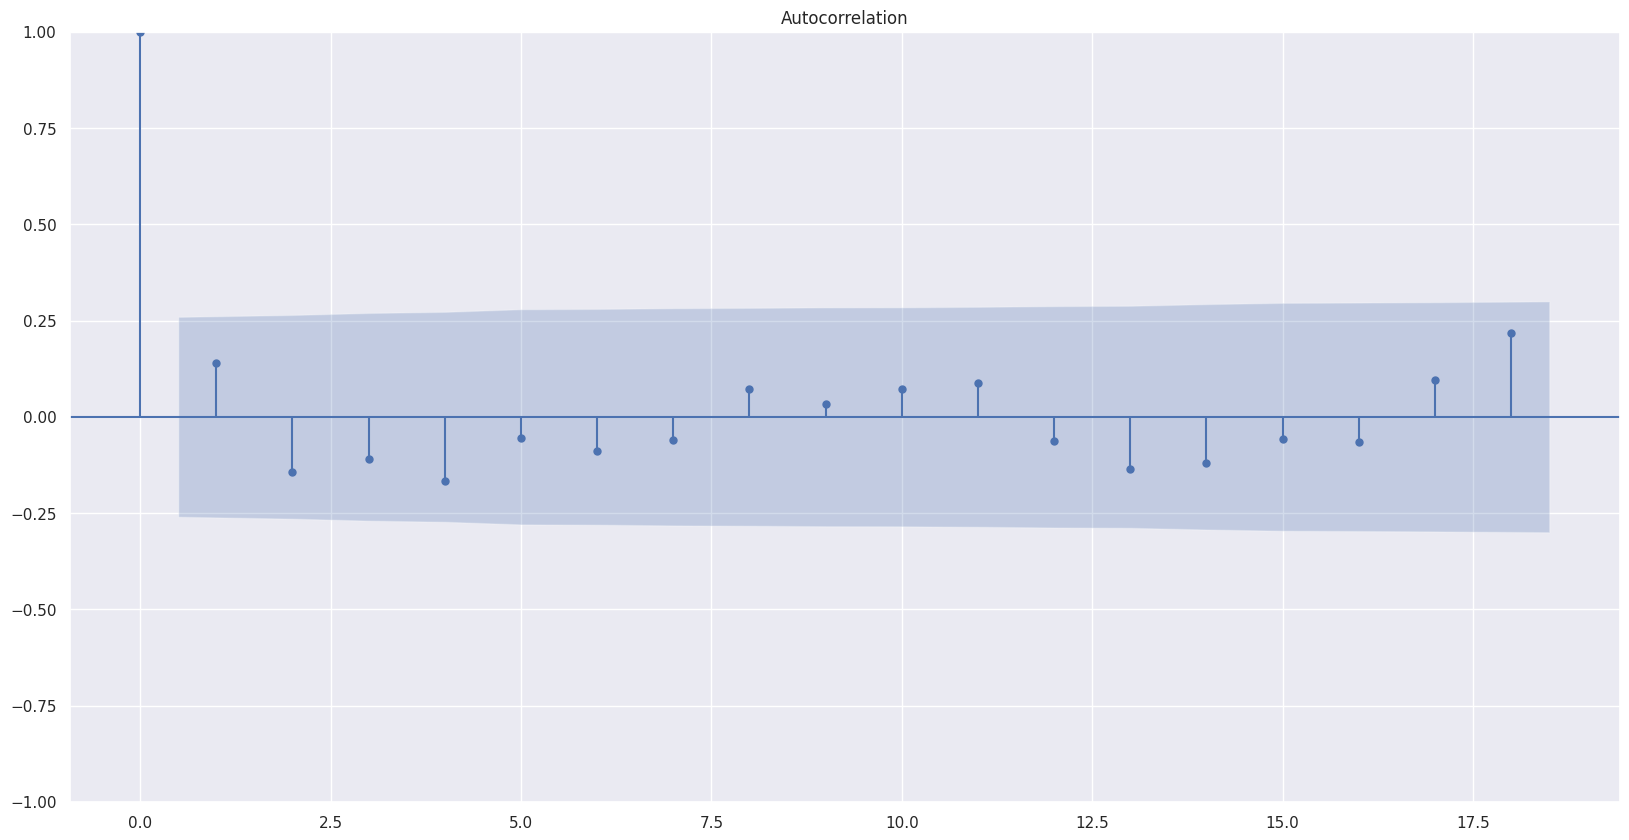

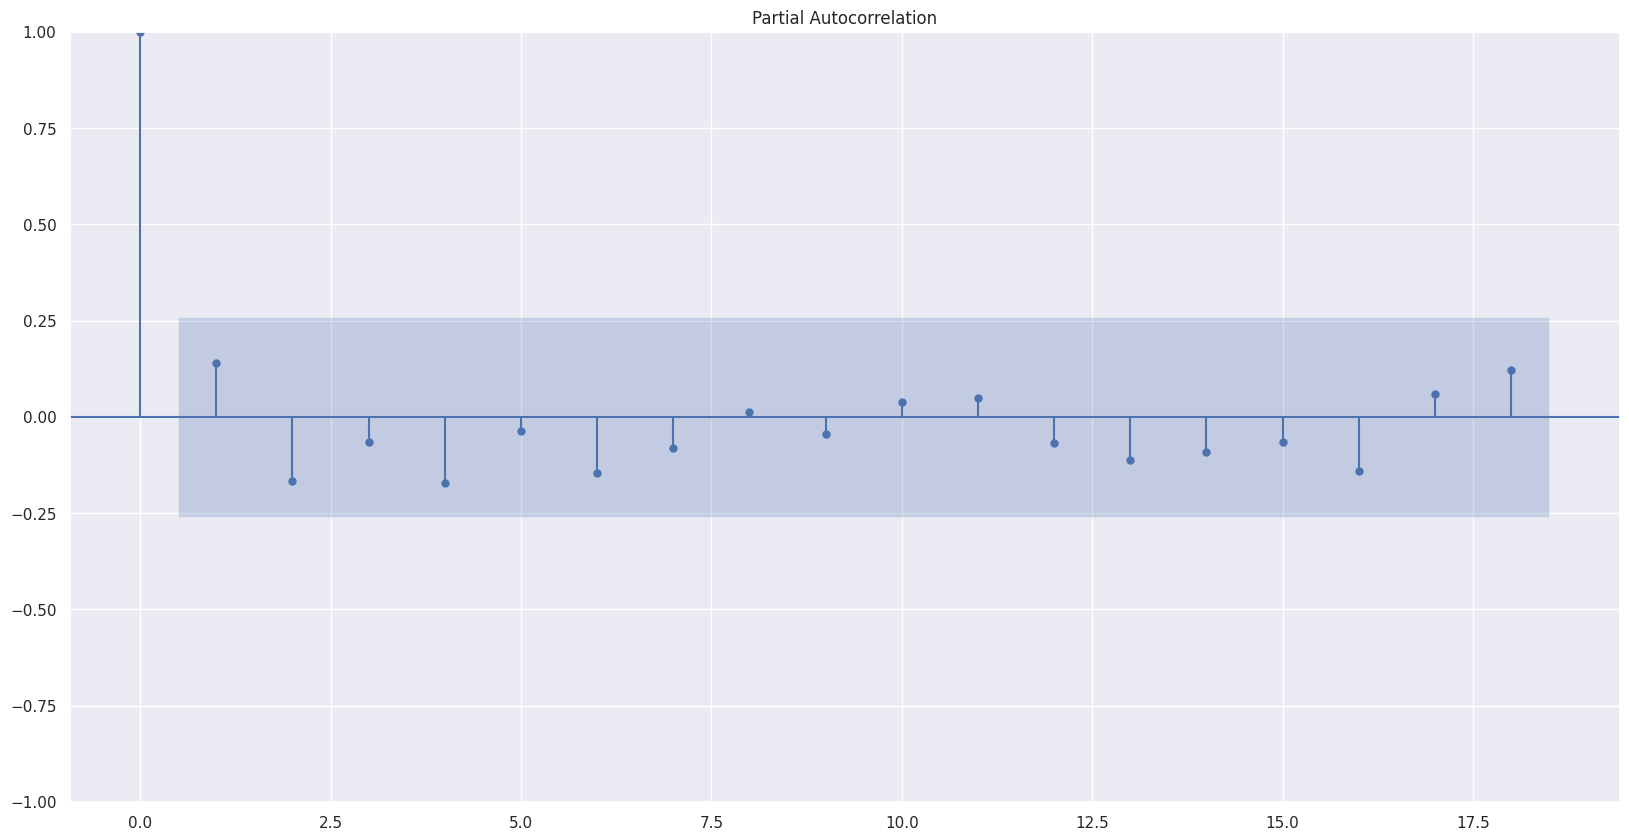

In [ ]:
plot_acf(da_diff.energy_consumption_per_capita)
plot_pacf(da_diff.energy_consumption_per_capita)
plt.show()

Corroboramos graficamente que la FAC de la serie con una diferenciacion verifica un decrecimiento exponencial

Phillips-Perron

In [ ]:
from arch.unitroot import PhillipsPerron

In [ ]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
Phillips_Perron(da)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: 1.8733187870225199
p-valor: 0.9862407072776507
numero de lags: 11
Valor Critico:
   1% : -2.606080904893813
   5% : -1.9465793869098724
   10% : -1.6128587250058046
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 1
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -0.6632264075865071
p-valor: 0.8560462227245215
numero de lags: 11
Valor Critico:
   1% : -3.5506699942762414
   5% : -2.913766394626147
   10% : -2.5946240473991997
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 1
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -2.263608321161395
p-valor: 0.45417408191438646
numero de lags: 11
Valor Critico:
   1% : -4.127070491379263
   5% : -3.490540734099021
   10%

In [ ]:
Phillips_Perron(da_diff)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -6.081673599302235
p-valor: 6.293677937229272e-09
numero de lags: 11
Valor Critico:
   1% : -2.606821568877551
   5% : -1.9466916602131925
   10% : -1.612798147776968
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -6.4449469004579205
p-valor: 1.5743117043366745e-08
numero de lags: 11
Valor Critico:
   1% : -3.552928203580539
   5% : -2.9147306250000002
   10% : -2.595137155612245
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -6.366316377298595
p-valor: 3.616011682815362e-07
numero de lags: 11
Valor Critico:
   1% : -4.130261462053571
   5% : -3.4920297480867344
   1

Idem segun criterio de Perron (solo una diferenciacion es suficiente)

KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
kpss_test(da)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 1.1244291789489351
p-valor: 0.01
numero de lags: 4
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.1520275063962578
p-valor: 0.04497707800311849
numero de lags: 4
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



In [ ]:
kpss_test(da_diff)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.04623039704413811
p-valor: 0.1
numero de lags: 1
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.043249572516678374
p-valor: 0.1
numero de lags: 1
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



Idem criterio KPSS (una sola diferenciacion es suficiente para volver estacionaria a la serie)

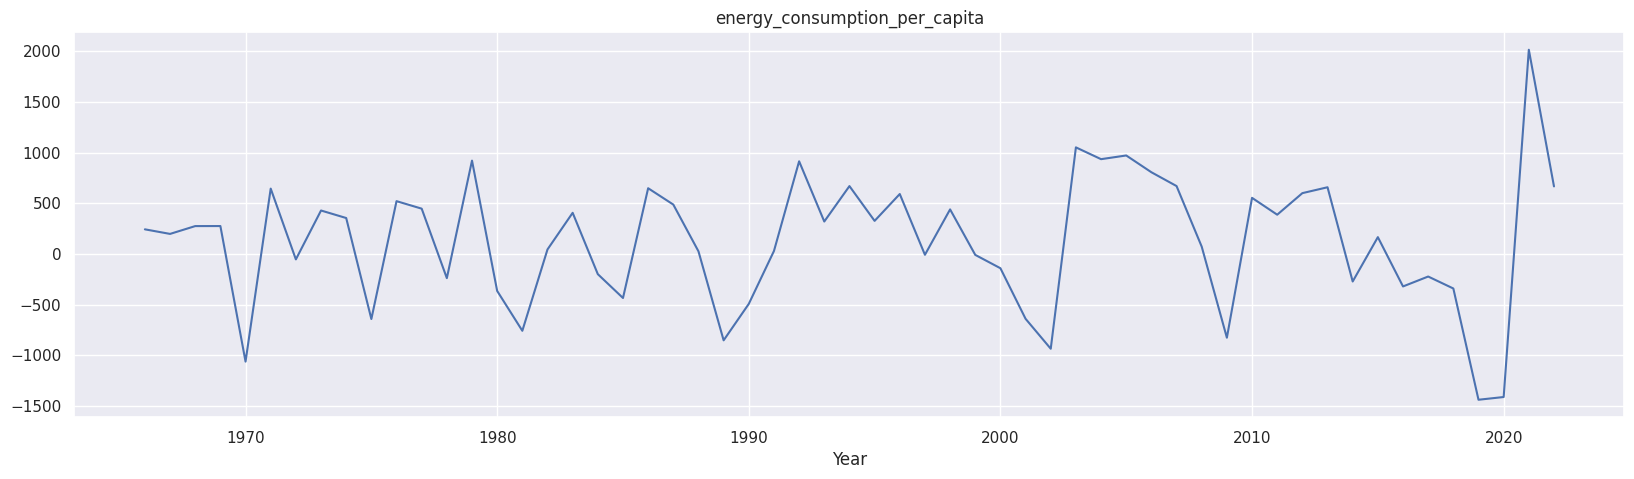

In [ ]:
da_diff.energy_consumption_per_capita.plot(figsize=(20,5), title = "energy_consumption_per_capita")
plt.show()

Graficando la serie diferenciada, podemos ver ahora la ausencia de tendencia

In [ ]:
X_diff2= da2[['energy_consumption_per_capita' ]].copy()
da2_diff=X_diff2.diff(axis = 0, periods = 1)
da2_diff.head()
da2_diff.drop([1965], inplace=True)

In [ ]:
da2_diff.head()

,energy_consumption_per_capita
Year,
1966,242.885
1967,197.726
1968,274.853
1969,275.246
1970,-1061.735


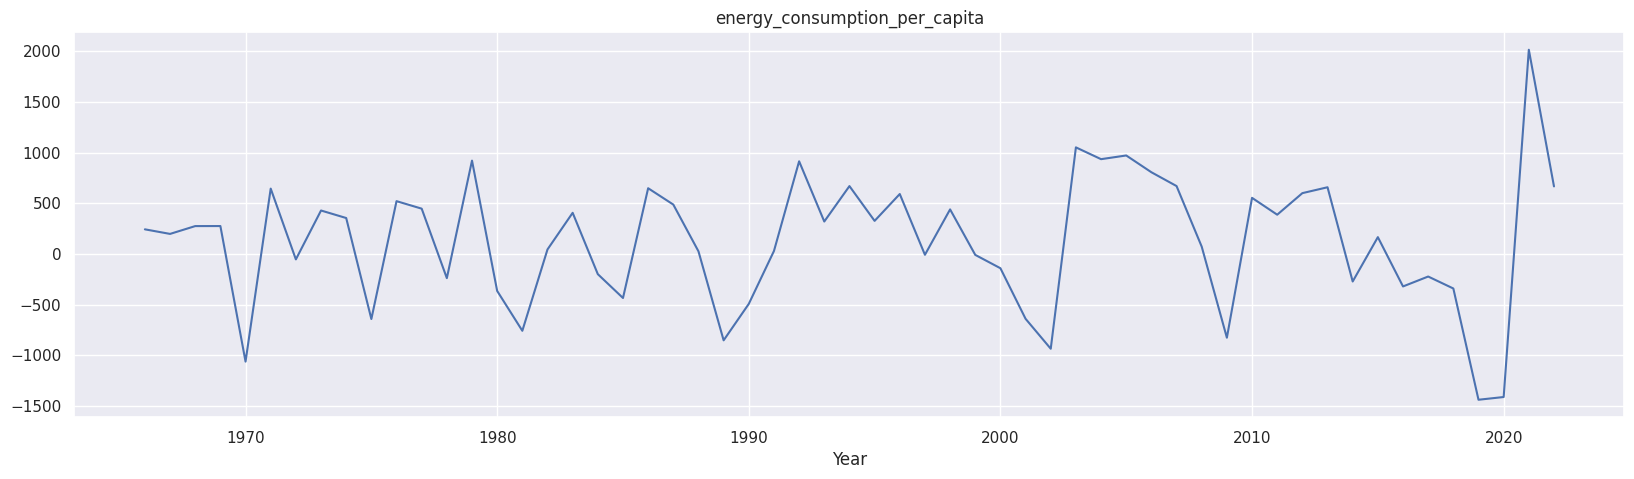

In [ ]:
da2_diff.energy_consumption_per_capita.plot(figsize=(20,5), title = "energy_consumption_per_capita")
plt.show()

In [ ]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = da.iloc[:round(len(da)*.80)]

# Seleccionamos el 20% restante para test
test = da.iloc[round(len(da)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

      energy_consumption_per_capita
Year                               
1965                     14896.7370
1966                     15139.6220
1967                     15337.3480
1968                     15612.2010
1969                     15887.4470
1970                     14825.7120
1971                     15470.2470
1972                     15416.6920
1973                     15845.2580
1974                     16199.6810
1975                     15557.9690
1976                     16078.7295
1977                     16525.4920
1978                     16286.9300
1979                     17207.5680
1980                     16842.9060
1981                     16085.1020
1982                     16129.6030
1983                     16535.4260
1984                     16336.1760
1985                     15901.7740
1986                     16549.9900
1987                     17037.0800
1988                     17062.9360
1989                     16211.0470
1990                     157

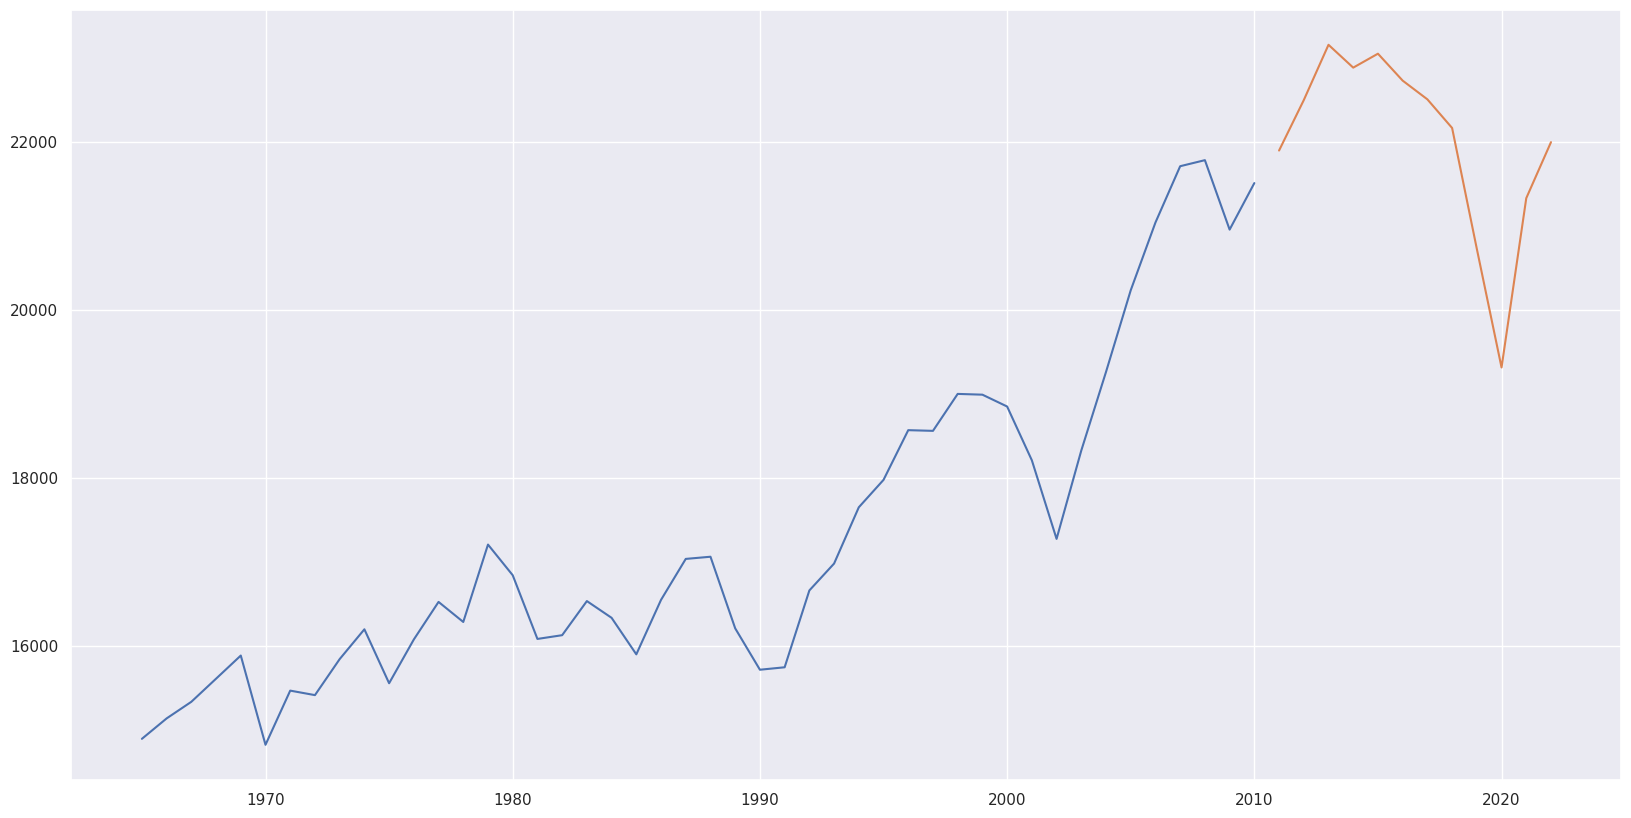

In [ ]:

# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [ ]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

stepwise_1=auto_arima(train, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True,  trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=700.867, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=702.457, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=702.413, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=701.885, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=704.581, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.239 seconds


In [ ]:
model_1= sm.tsa.arima.ARIMA(train, order=(0,1,0))
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     energy_consumption_per_capita   No. Observations:                   46
Model:                            ARIMA(0, 1, 0)   Log Likelihood                -349.942
Date:                           Sun, 12 Nov 2023   AIC                            701.885
Time:                                   20:18:16   BIC                            703.691
Sample:                                        0   HQIC                           702.558
                                            - 46                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.326e+05   1.01e+05      3.305      0.001    1.35e+05     5.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.45   Prob(JB):                         0.30
Heteroskedasticity (H):               1.70   Skew:                            -0.45
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Pruebo otros modelos

In [ ]:
model_2= sm.tsa.arima.ARIMA(train, order=(1,1,1))
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     energy_consumption_per_capita   No. Observations:                   46
Model:                            ARIMA(1, 1, 1)   Log Likelihood                -349.366
Date:                           Sun, 12 Nov 2023   AIC                            704.733
Time:                                   20:18:18   BIC                            710.153
Sample:                                        0   HQIC                           706.753
                                            - 46                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1058      1.223      0.087      0.931      -2.290       2.502
ma.L1          0.0099      1.246      0.008      0.994      -2.432       2.452
sigma2      3.217e+05   9.49e+04      3.388      0.001    1.36e+05    5.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.98   Prob(JB):                         0.39
Heteroskedasticity (H):               1.43   Skew:                            -0.33
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_3= sm.tsa.arima.ARIMA(train, order=(0,1,1))
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     energy_consumption_per_capita   No. Observations:                   46
Model:                            ARIMA(0, 1, 1)   Log Likelihood                -349.371
Date:                           Sun, 12 Nov 2023   AIC                            702.742
Time:                                   20:18:20   BIC                            706.356
Sample:                                        0   HQIC                           704.089
                                            - 46                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1161      0.136      0.854      0.393      -0.150       0.383
sigma2      3.216e+05   9.29e+04      3.463      0.001     1.4e+05    5.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.99   Prob(JB):                         0.39
Heteroskedasticity (H):               1.42   Skew:                            -0.33
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TRANSFORMACION logaritmica




In [ ]:
da_log=da.copy()
da_log = np.log(da_log)
da_log

,energy_consumption_per_capita
Year,
1965,9.608897
1966,9.625071
1967,9.638046
1968,9.655808
1969,9.673285
1970,9.604118
1971,9.646674
1972,9.643206
1973,9.670626


In [ ]:
train_log = da_log.iloc[:round(len(da_log)*.80)]

# Seleccionamos el 20% restante para test
test_log = da_log.iloc[round(len(da_log)*.80):]

In [ ]:
auto_arima(train_log, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=10, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=-177.406, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=-173.874, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=-173.811, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=-176.610, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=-175.791, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=-175.670, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[10] intercept   : AIC=-174.357, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=-175.555, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=-175.596, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[10] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[10] intercept
Total fit time: 1.623 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  90.703
Date:                Sun, 12 Nov 2023   AIC                           -177.406
Time:                        20:18:27   BIC                           -173.792
Sample:                             0   HQIC                          -176.059
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0082      0.005      1.521      0.128      -0.002       0.019
sigma2         0.0010      0.000      3.592      0.000       0.000       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.73
Prob(Q):                              0.69   Prob(JB):                         0.25
Heteroskedasticity (H):               1.11   Skew:                            -0.53
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_LOG= sm.tsa.arima.ARIMA(train_log, order=(1,1,1))
result_LOG = model_LOG.fit()
result_LOG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     energy_consumption_per_capita   No. Observations:                   46
Model:                            ARIMA(1, 1, 1)   Log Likelihood                  90.161
Date:                           Sun, 12 Nov 2023   AIC                           -174.322
Time:                                   20:18:35   BIC                           -168.902
Sample:                                        0   HQIC                          -172.301
                                            - 46                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8696      0.212     -4.098      0.000      -1.286      -0.454
ma.L1          0.9997     23.690      0.042      0.966     -45.432      47.432
sigma2         0.0010      0.024      0.042      0.966      -0.047       0.049
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.97   Prob(JB):                         0.31
Heteroskedasticity (H):               1.06   Skew:                            -0.40
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
da_Rcuadrado=da.copy()
da_Rcuadrado=np.sqrt(da_Rcuadrado)
da_Rcuadrado

,energy_consumption_per_capita
Year,
1965,122.052190
1966,123.043171
1967,123.844047
1968,124.948794
1969,126.045416
1970,121.760880
1971,124.379448
1972,124.163972
1973,125.877949


In [ ]:
train_R2 = da_Rcuadrado.iloc[:round(len(da_Rcuadrado)*.80)]

# Seleccionamos el 20% restante para test
test_R2 = da_Rcuadrado.iloc[round(len(da_Rcuadrado)*.80):]

In [ ]:
auto_arima(train_R2, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=10, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=199.119, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=202.505, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=202.529, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=200.030, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=200.704, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=200.836, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[10] intercept   : AIC=202.163, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=200.811, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=200.738, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[10] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[10] intercept
Total fit time: 0.826 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -97.559
Date:                Tue, 14 Nov 2023   AIC                            199.119
Time:                        20:30:40   BIC                            202.732
Sample:                             0   HQIC                           200.466
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5467      0.348      1.571      0.116      -0.135       1.229
sigma2         4.4732      1.266      3.532      0.000       1.991       6.955
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.57   Prob(JB):                         0.27
Heteroskedasticity (H):               1.34   Skew:                            -0.49
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_R2= sm.tsa.arima.ARIMA(train_R2, order=(1,1,1))
result_R2 = model_R2.fit()
result_R2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     energy_consumption_per_capita   No. Observations:                   46
Model:                            ARIMA(1, 1, 1)   Log Likelihood                 -98.146
Date:                           Tue, 14 Nov 2023   AIC                            202.291
Time:                                   20:30:54   BIC                            207.711
Sample:                                        0   HQIC                           204.312
                                            - 46                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8667      0.216     -4.017      0.000      -1.290      -0.444
ma.L1          0.9998     25.139      0.040      0.968     -48.271      50.271
sigma2         4.4475    111.516      0.040      0.968    -214.120     223.015
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.91   Prob(JB):                         0.30
Heteroskedasticity (H):               1.27   Skew:                            -0.37
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Transformacion de Box y Cox

In [ ]:
#BOX & COX
from scipy import stats

da_BoxCox = da.copy()
transform = np.asarray(da_BoxCox['energy_consumption_per_capita'].values)
fitted_data, fitted_lambda = stats.boxcox(transform)
#da['energy_consumption_per_capita'] = fitted_data


In [ ]:
fitted_data

array([0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999, 0.45774999, 0.45774999,
       0.45774999, 0.45774999, 0.45774999])

In [ ]:
da_boxcox=pd.DataFrame(fitted_data, columns=['energy_consumption_per_capita'])
da_boxcox

,energy_consumption_per_capita
0,0.45775
1,0.45775
2,0.45775
3,0.45775
4,0.45775
5,0.45775
6,0.45775
7,0.45775
8,0.45775
9,0.45775


In [ ]:
da_boxcox = da_boxcox.set_index(da.index)
da_boxcox.index.name = 'Year'
da_boxcox.head()

,energy_consumption_per_capita
Year,
1965,0.45775
1966,0.45775
1967,0.45775
1968,0.45775
1969,0.45775


In [ ]:
train_BC = fitted_data[:round(len(fitted_data)*.80)]

# Seleccionamos el 20% restante para test
test_BC = fitted_data[round(len(fitted_data)*.80):]


In [ ]:
from scipy.stats import jarque_bera, shapiro, boxcox, probplot

In [ ]:
print(f" El lambda óptima aproximado es =  {fitted_lambda}")

 El lambda óptima aproximado es =  -2.1845986155468506


In [ ]:
auto_arima(train_BC, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=10, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=-937.797, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=-927.606, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=-952.831, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=-1045.732, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=-937.011, Time=0.66 sec
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=-965.935, Time=0.40 sec
 ARIMA(0,1,0)(1,0,1)[10] intercept   : AIC=-950.812, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=-935.486, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=-931.453, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[10] intercept   : AIC=-933.797, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[10]          
Total fit time: 3.942 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 523.866
Date:                Sun, 12 Nov 2023   AIC                          -1045.732
Time:                        20:19:34   BIC                          -1043.926
Sample:                             0   HQIC                         -1045.059
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.25e-12   2.87e-10      0.025      0.980   -5.55e-10     5.7e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.76   Prob(JB):                         0.20
Heteroskedasticity (H):               0.51   Skew:                            -0.65
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_BC= sm.tsa.arima.ARIMA(train_BC, order=(1,1,0))
result_BC = model_BC.fit()
result_BC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 498.384
Date:                Sun, 12 Nov 2023   AIC                           -992.769
Time:                        20:19:39   BIC                           -989.156
Sample:                             0   HQIC                          -991.422
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0027   5.53e-19   4.86e+15      0.000       0.003       0.003
sigma2      2.296e-11   2.89e-10      0.080      0.937   -5.43e-10    5.89e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.74   Prob(JB):                         0.20
Heteroskedasticity (H):               0.51   Skew:                            -0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train2 = da2.iloc[:round(len(da2)*.80)]

# Seleccionamos el 20% restante para test
test2 = da2.iloc[round(len(da2)*.80):]


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargar los datos y preparar la serie temporal
# (El código para cargar y preparar los datos permanece igual)

# Función para encontrar el mejor modelo SARIMA basado en AIC
def find_best_sarima(train, p_values, d_values, q_values, P_values, D_values, Q_values, M_values):
    best_aic = float("inf")
    best_order = None
    best_seasonal_order = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in M_values:
                                order = (p, d, q)
                                seasonal_order = (P, D, Q, m)
                                try:
                                    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
                                    results = model.fit(disp=False)
                                    aic = results.aic
                                    if aic < best_aic:
                                        best_aic = aic
                                        best_order = order
                                        best_seasonal_order = seasonal_order
                                except:
                                    continue

    return best_order, best_seasonal_order, best_aic

# Define los rangos de órdenes de parámetros a considerar
p_values = range(0, 3)
d_values = [1]
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
M_values = range(2, 7)

# Encuentra el mejor modelo SARIMA basado en AIC
best_order_aic, best_seasonal_order_aic, best_aic = find_best_sarima(train, p_values, d_values, q_values, P_values, D_values, Q_values, M_values)

# Imprime los resultados
print("Mejor modelo SARIMA basado en AIC:")
print(f"Orden de parámetros: {best_order_aic}")
print(f"Orden de parámetros estacional: {best_seasonal_order_aic}")
print(f"AIC: {best_aic}")


Mejor modelo SARIMA basado en AIC:
Orden de parámetros: (2, 1, 1)
Orden de parámetros estacional: (1, 0, 0, 5)
AIC: 10.0


In [ ]:
model_4= sm.tsa.arima.ARIMA(train, order=((0,1),1,1),seasonal_order=(1,0,0,5))
result_4 = model_4.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:      energy_consumption_per_capita   No. Observations:                   46
Model:             ARIMA([2], 1, 1)x(1, 0, [], 5)   Log Likelihood                -348.434
Date:                            Sun, 12 Nov 2023   AIC                            704.869
Time:                                    20:19:55   BIC                            712.095
Sample:                                         0   HQIC                           707.563
                                             - 46                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2          0.0100      0.146      0.068      0.946      -0.277       0.297
ma.L1          0.1104      0.142      0.775      0.438      -0.169       0.390
ar.S.L5       -0.1493      0.117     -1.277      0.202      -0.379       0.080
sigma2      3.186e+05   9.34e+04      3.410      0.001    1.36e+05    5.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.93   Prob(JB):                         0.46
Heteroskedasticity (H):               1.51   Skew:                            -0.28
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Metricas de performance

In [ ]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    #print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [ ]:
# Utilizando el modelo realizamos la prediccion ---
predicciones_modelo1 = result_1.get_forecast(steps=len(test))
predicciones_modelo2 = result_2.get_forecast(steps=len(test))
predicciones_modelo3 = result_3.get_forecast(steps=len(test))
predicciones_modeloBC= result_BC.get_forecast(steps=len(test))
predicciones_modeloLOG= result_LOG.get_forecast(steps=len(test))
predicciones_modeloR2= result_R2.get_forecast(steps=len(test))
predicciones_modelo4= result_4.get_forecast(steps=len(test))


# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
#graficar_pred(test, predicciones_modelo3.predicted_mean, predicciones_modelo3.conf_int())

In [ ]:
#Evaluamos las métricas del modelo
evaluar_metricas(test, predicciones_modelo1.predicted_mean )

MSE: 1390457.6828996658
MAE: 1037.0221666666657
RMSE: 1179.176697064382


In [ ]:
evaluar_metricas(test, predicciones_modelo2.predicted_mean )

MSE: 1322024.1851666982
MAE: 1001.4084422777956
RMSE: 1149.7931053744835


In [ ]:
evaluar_metricas(test, predicciones_modelo3.predicted_mean )

MSE: 1319099.1432692145
MAE: 999.3372345048829
RMSE: 1148.5204148247494


In [ ]:
evaluar_metricas(test, predicciones_modelo4.predicted_mean )

MSE: 1497608.9460415964
MAE: 1080.5797405883447
RMSE: 1223.7683383882736


Antitransformo

In [ ]:
MSE_LOG = mean_squared_error(np.exp(test_log), np.exp(predicciones_modeloLOG.predicted_mean))
MAE_LOG =mean_absolute_error(np.exp(test_log), np.exp(predicciones_modeloLOG.predicted_mean))
RMSE_LOG = (np.sqrt(mean_squared_error(np.exp(test_log), np.exp(predicciones_modeloLOG.predicted_mean))))
print("Mean Squared Error (MSE) en escala original:", MSE_LOG)
print("Mean Absolute Error (MAE) en escala original:", MAE_LOG)
print("Root Mean Squared Error (RMSE) en escala original:", RMSE_LOG)


Mean Squared Error (MSE) en escala original: 1307520.3530865288
Mean Absolute Error (MAE) en escala original: 996.0862441912526
Root Mean Squared Error (RMSE) en escala original: 1143.4685623516411


In [ ]:
#evaluar_metricas(test, predicciones_modeloLOG.predicted_mean )

In [ ]:
MSE_R2 = mean_squared_error((test_R2)** 2, (predicciones_modeloR2.predicted_mean)** 2)
MAE_R2 =mean_absolute_error((test_R2)** 2, (predicciones_modeloR2.predicted_mean)** 2)
RMSE_R2 = np.sqrt(mean_squared_error((test_R2)**2, (predicciones_modeloR2.predicted_mean)**2))
print("Mean Squared Error (MSE) en escala original:", MSE_R2)
print("Mean Absolute Error (MAE) en escala original:", MAE_R2)
print("Root Mean Squared Error (RMSE) en escala original:", RMSE_R2)

Mean Squared Error (MSE) en escala original: 1306278.0513415502
Mean Absolute Error (MAE) en escala original: 995.2182848420811
Root Mean Squared Error (RMSE) en escala original: 1142.925216863094


In [ ]:
#evaluar_metricas(test_R2, predicciones_modeloR2.predicted_mean)

In [ ]:
from scipy.special import inv_boxcox
fitted_lambda

-2.1845986155468506

In [ ]:
valores_antitransformados = inv_boxcox(predicciones_modeloBC.predicted_mean, fitted_lambda)
test_antit=inv_boxcox(test_BC, fitted_lambda)

# Convertir los valores antitransformados a un array de tipo numpy
valores_antitransformados = np.array(valores_antitransformados)
#test_antit= np.array(test_antit)

# Calcular MSE, MAE y RMSE en escala original
MSE_BC = mean_squared_error(test, valores_antitransformados)
MAE_BC = mean_absolute_error(test, valores_antitransformados)
RMSE_BC = np.sqrt(mean_squared_error(test, valores_antitransformados))

print("Mean Squared Error (MSE) en escala original:", MSE_BC)
print("Mean Absolute Error (MAE) en escala original:", MAE_BC)
print("Root Mean Squared Error (RMSE) en escala original:", RMSE_BC)


Mean Squared Error (MSE) en escala original: 1388877.3726413138
Mean Absolute Error (MAE) en escala original: 1036.2481250867331
Root Mean Squared Error (RMSE) en escala original: 1178.5064160373986


In [ ]:
#evaluar_metricas(test_BC, predicciones_modeloBC.predicted_mean )

De acuerdo a todos los criterios evaluados, el modelo 3 resulta tener mejor performance

Analisis de Residuos (Modelo 3)

Chequeamos los residuos del modelo elegido.
Los residuos corresponden a la diferencia entre los valores observados y los valores ajustados según el modelo.

Un buen método de pronóstico producirá residuos con las siguientes propiedades:

ESCENCIALES =

Los residuos no estén correlacionados. Si hay correlación entre los residuales, esto es que queda información en los residuales que debe usarse para calcular los pronósticos
Los residuos tienen media cero. Si tienen media distinta a cero, esto significa que están sesgados.
Propiedades útiles que facilitan el cálculo de los intervalos de predicción

FACILITAN EL CALCULO DE LOS INTERVALOS DE PREDICCION.

Los residuos tienen varianza constante.

Los residuos se distribuyen normalmente.

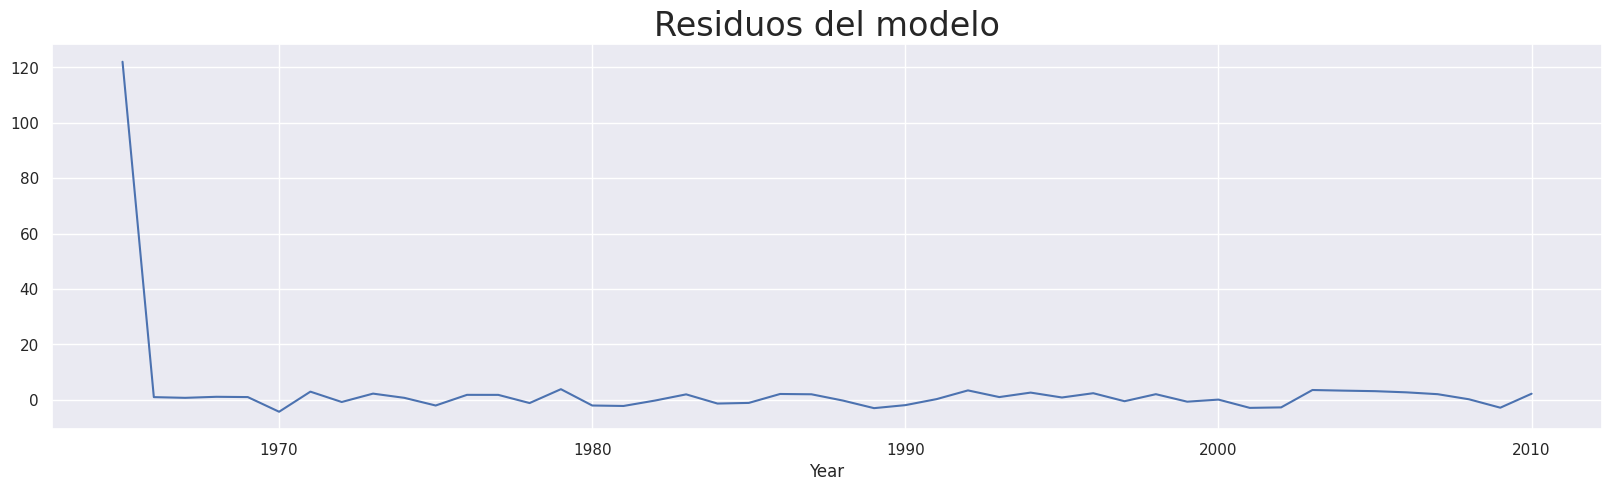

In [ ]:
result_R2.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

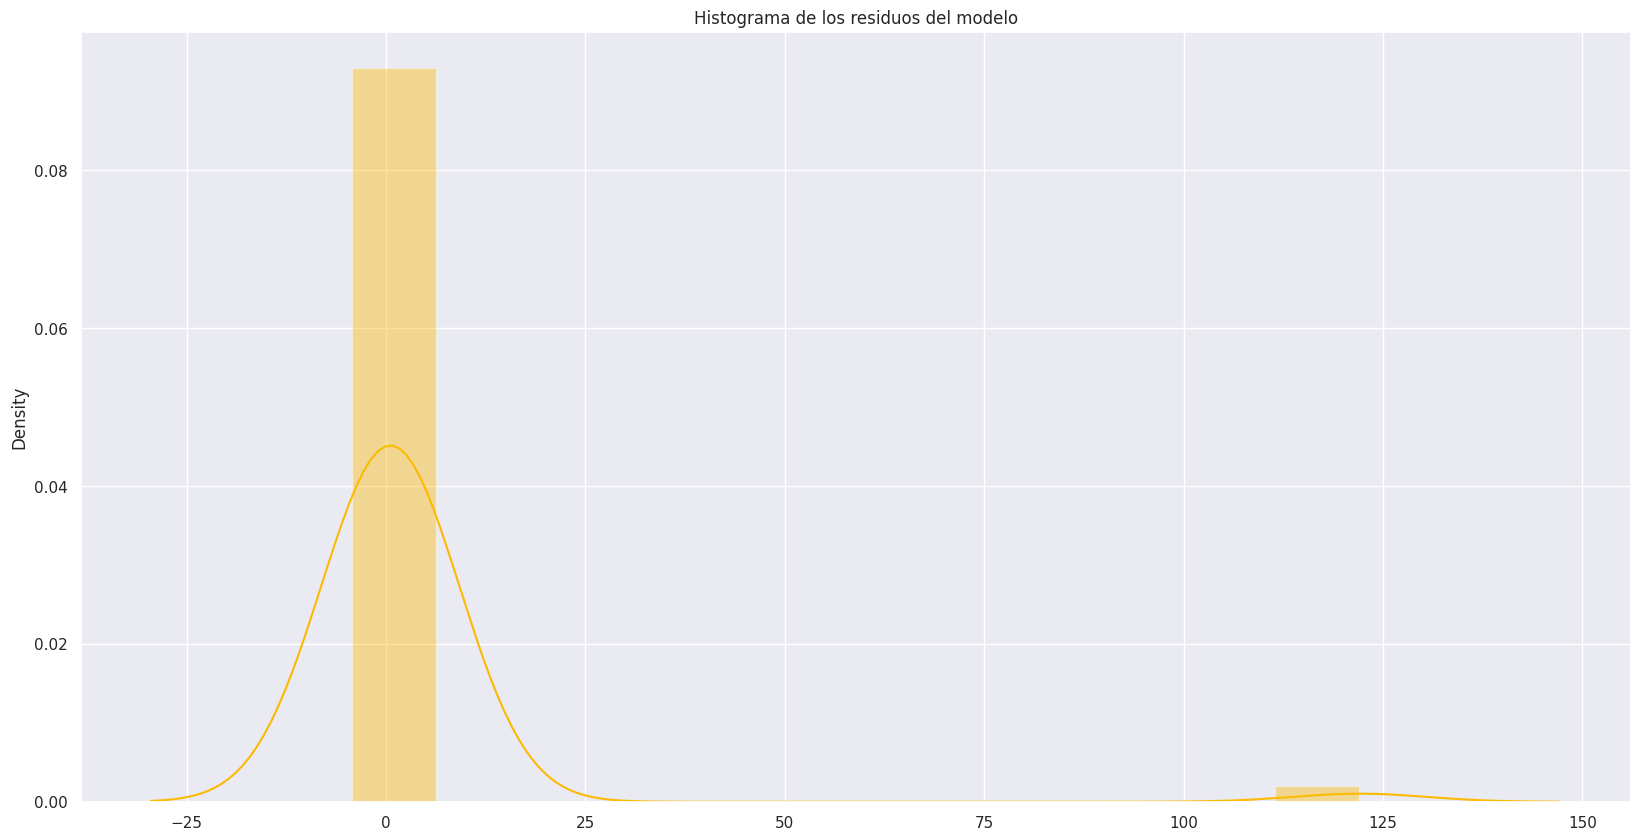

In [ ]:
sns.distplot(result_R2.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

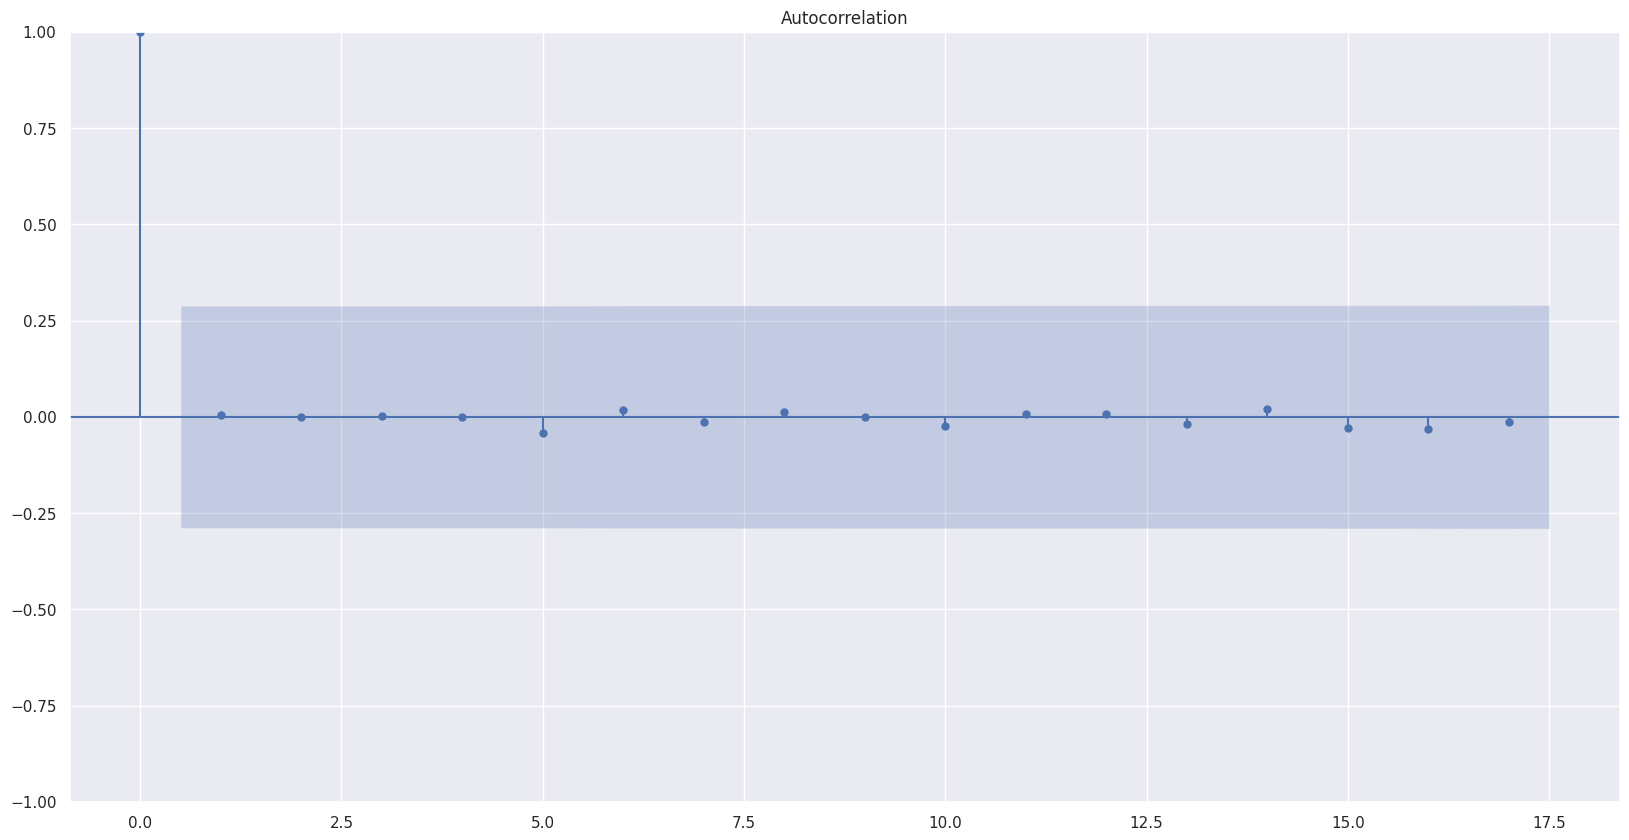

In [ ]:
plot_acf(result_R2.resid);

In [ ]:
import scipy.stats
import pylab

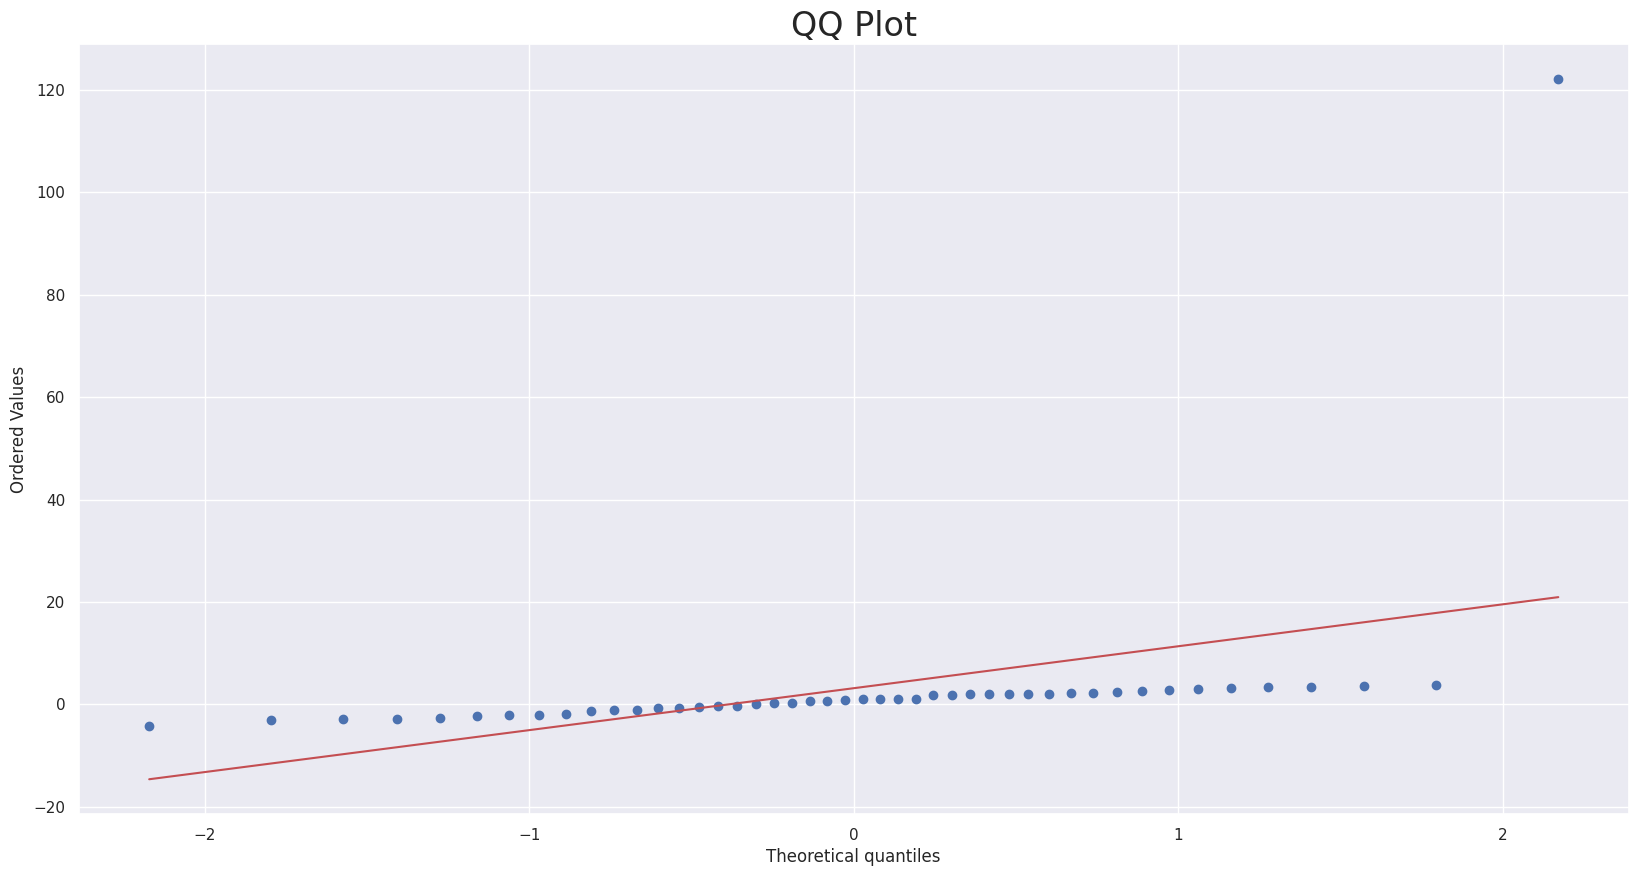

In [ ]:
scipy.stats.probplot(result_R2.resid, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

Aqui trabajamos con el test de L-Jung Box. Trabajamos la incorrelacion o no de los residuos del modelo. Si hay algun valor que rechazo, entonces algun componente no estoy especificando bien en mi modelo y tiene correlacion. Entonces, tendria que incorporarlo a la especificacion. Este test es fundamental cuando analizo los residuos del modelo que tienen que comportarse como un ruido blanco.

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result_R2.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.000739,0.978314
2,0.000739,0.999631
3,0.000815,0.999994
4,0.000817,1.000000
5,0.099415,0.999840
6,0.114351,0.999970
7,0.124587,0.999995
8,0.135140,0.999999
9,0.135332,1.000000
10,0.170694,1.000000


Text(0, 0.5, 'P-valores ')

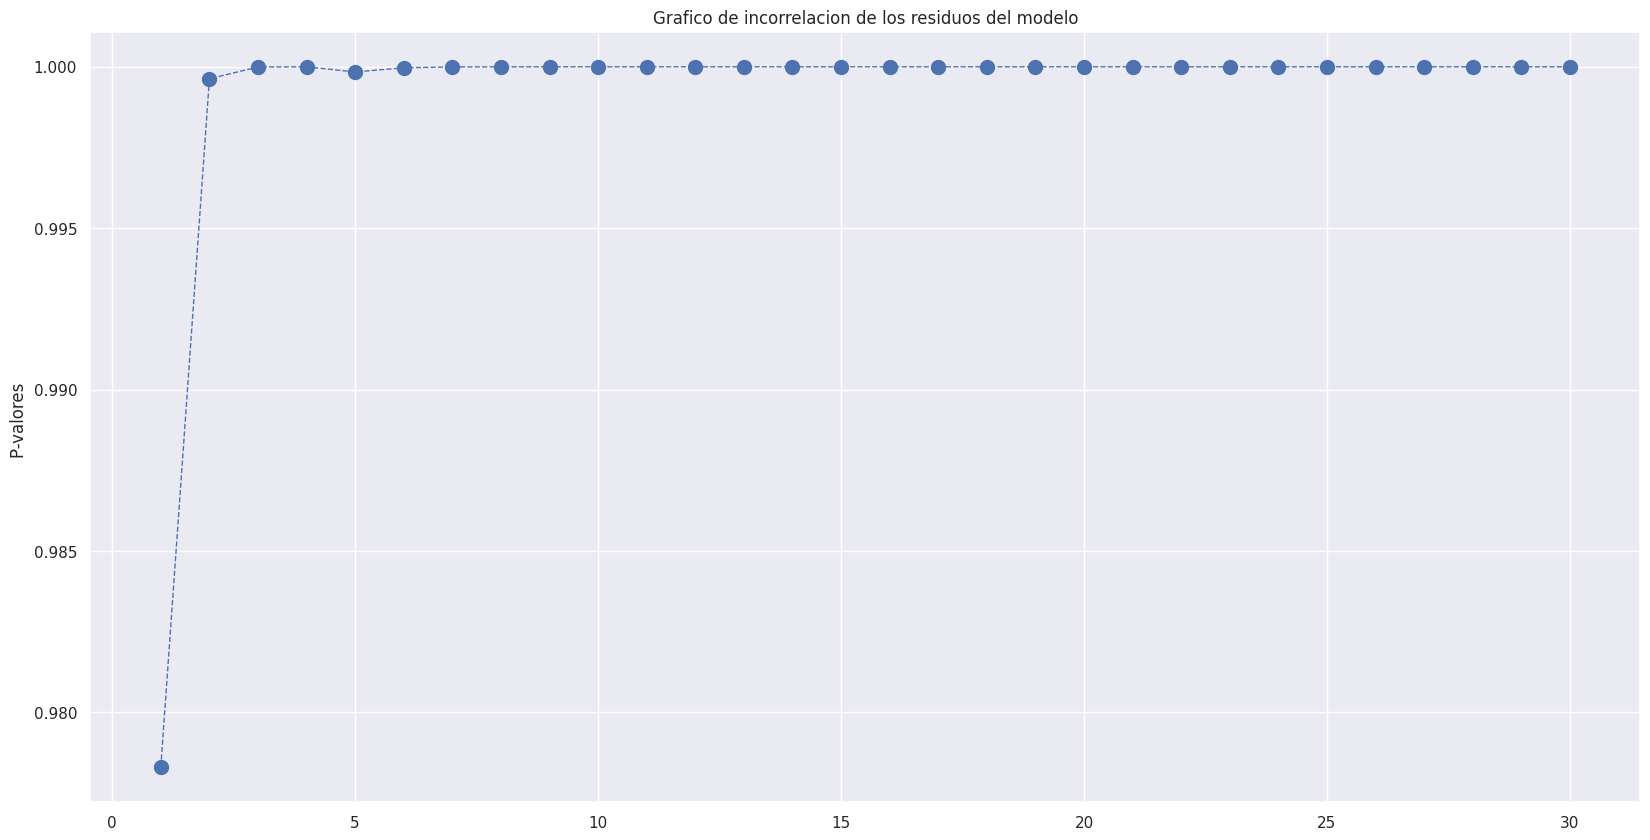

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

In [ ]:
predictions = result_1.get_forecast(steps=len(test))

forecasted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

mse = mean_squared_error(test, forecasted_values)
mae = mean_absolute_error(test, forecasted_values)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático medio (MSE): 1390457.6828996658
Error Absoluto Medio (MAE): 1037.0221666666657


In [ ]:
forecasted_values.index = test.index

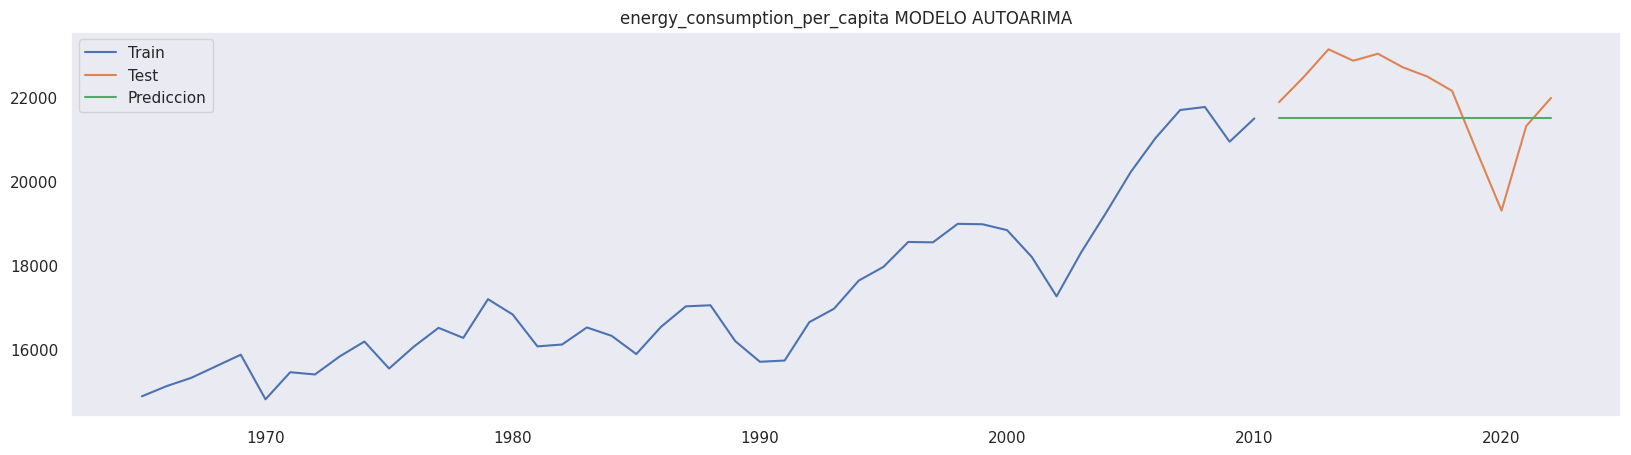

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['energy_consumption_per_capita'], label='Train')
plt.plot(test['energy_consumption_per_capita'], label='Test')
plt.plot(forecasted_values, label='Prediccion')
plt.legend(loc='best')
plt.title('energy_consumption_per_capita MODELO AUTOARIMA')
plt.show()

In [ ]:
forecasted_values

Year
2011    21507.703
2012    21507.703
2013    21507.703
2014    21507.703
2015    21507.703
2016    21507.703
2017    21507.703
2018    21507.703
2019    21507.703
2020    21507.703
2021    21507.703
2022    21507.703
Name: predicted_mean, dtype: float64

In [ ]:
predictions = result_4.get_forecast(steps=len(test))

forecasted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

mse = mean_squared_error(test, forecasted_values)
mae = mean_absolute_error(test, forecasted_values)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático medio (MSE): 1497608.9460415964
Error Absoluto Medio (MAE): 1080.5797405883447


In [ ]:
forecasted_values.index = test.index

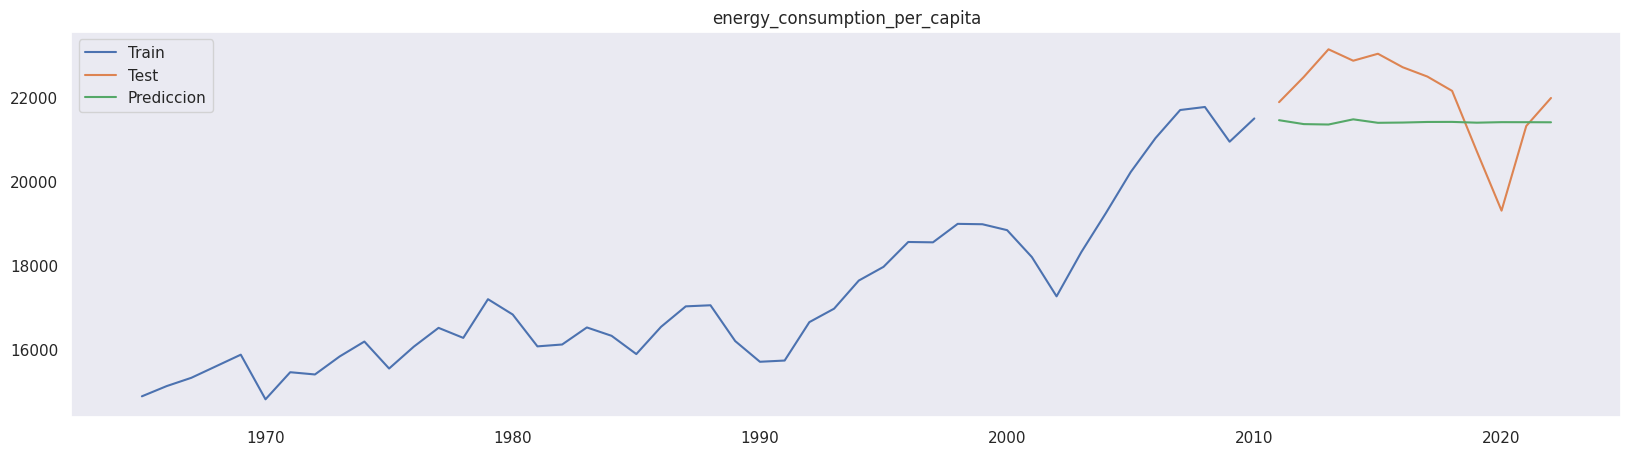

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['energy_consumption_per_capita'], label='Train')
plt.plot(test['energy_consumption_per_capita'], label='Test')
plt.plot(forecasted_values, label='Prediccion')
plt.legend(loc='best')
plt.title('energy_consumption_per_capita')
plt.show()

In [ ]:
forecasted_values

Year
2011    21466.060772
2012    21373.025527
2013    21363.056872
2014    21486.493360
2015    21403.854409
2016    21410.073745
2017    21423.967243
2018    21425.455919
2019    21407.022529
2020    21419.363419
2021    21418.434655
2022    21416.359869
Name: predicted_mean, dtype: float64

In [ ]:
predictions = result_LOG.get_forecast(steps=len(test))

forecasted_values = np.exp(predictions.predicted_mean)
confidence_intervals = predictions.conf_int()

mse = mean_squared_error(test, forecasted_values)
mae = mean_absolute_error(test, forecasted_values)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático medio (MSE): 1307520.3530865342
Error Absoluto Medio (MAE): 996.0862441912537


In [ ]:
forecasted_values.index = test.index

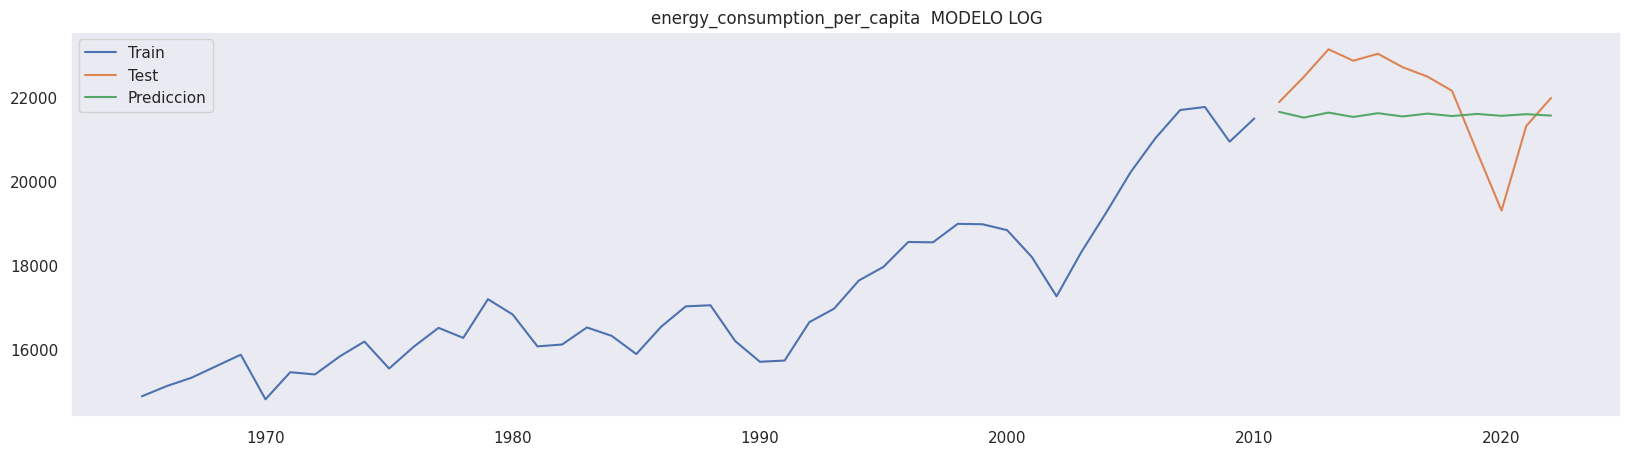

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['energy_consumption_per_capita'], label='Train')
plt.plot(test['energy_consumption_per_capita'], label='Test')
plt.plot(forecasted_values, label='Prediccion')
plt.legend(loc='best')
plt.title('energy_consumption_per_capita  MODELO LOG')
plt.show()

In [ ]:
predictions = result_R2.get_forecast(steps=len(test))

forecasted_values = (predictions.predicted_mean)** 2
confidence_intervals = predictions.conf_int()

mse = mean_squared_error(test, forecasted_values)
mae = mean_absolute_error(test, forecasted_values)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático medio (MSE): 1306278.0513415511
Error Absoluto Medio (MAE): 995.2182848420816


In [ ]:
forecasted_values.index = test.index

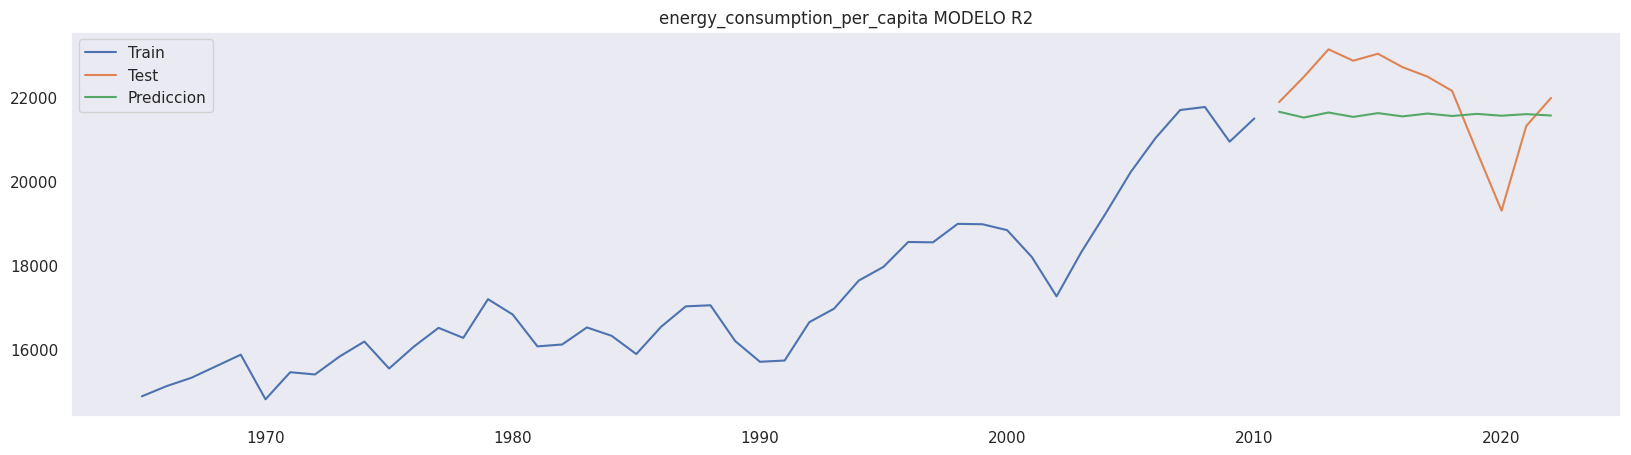

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['energy_consumption_per_capita'], label='Train')
plt.plot(test['energy_consumption_per_capita'], label='Test')
plt.plot(forecasted_values, label='Prediccion')
plt.legend(loc='best')
plt.title('energy_consumption_per_capita MODELO R2')
plt.show()

In [ ]:
forecasted_values

Year
2011    21666.679780
2012    21528.863579
2013    21648.281056
2014    21544.764946
2015    21634.466207
2016    21556.712935
2017    21624.092243
2018    21565.689706
2019    21616.301596
2020    21572.433734
2021    21610.450665
2022    21577.500125
Name: predicted_mean, dtype: float64

In [ ]:
predictions = result_BC.get_forecast(steps=len(test))

forecasted_values = inv_boxcox(predictions.predicted_mean,fitted_lambda)
confidence_intervals = predictions.conf_int()

mse = mean_squared_error(test, forecasted_values)
mae = mean_absolute_error(test, forecasted_values)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático medio (MSE): 1388877.3726413138
Error Absoluto Medio (MAE): 1036.2481250867331


In [ ]:
forecasted_values.index = test.index

AttributeError: ignored

In [ ]:
import pandas as pd

# Supongamos que `forecasted_values` es tu arreglo de valores pronosticados y `test` es tu conjunto de datos de prueba
# Convertir `forecasted_values` a un objeto de tipo pandas.Series
forecasted_series = pd.Series(forecasted_values, test.index)

# Ahora puedes asignar el índice de `test` a `forecasted_series`
forecasted_series.index = test.index


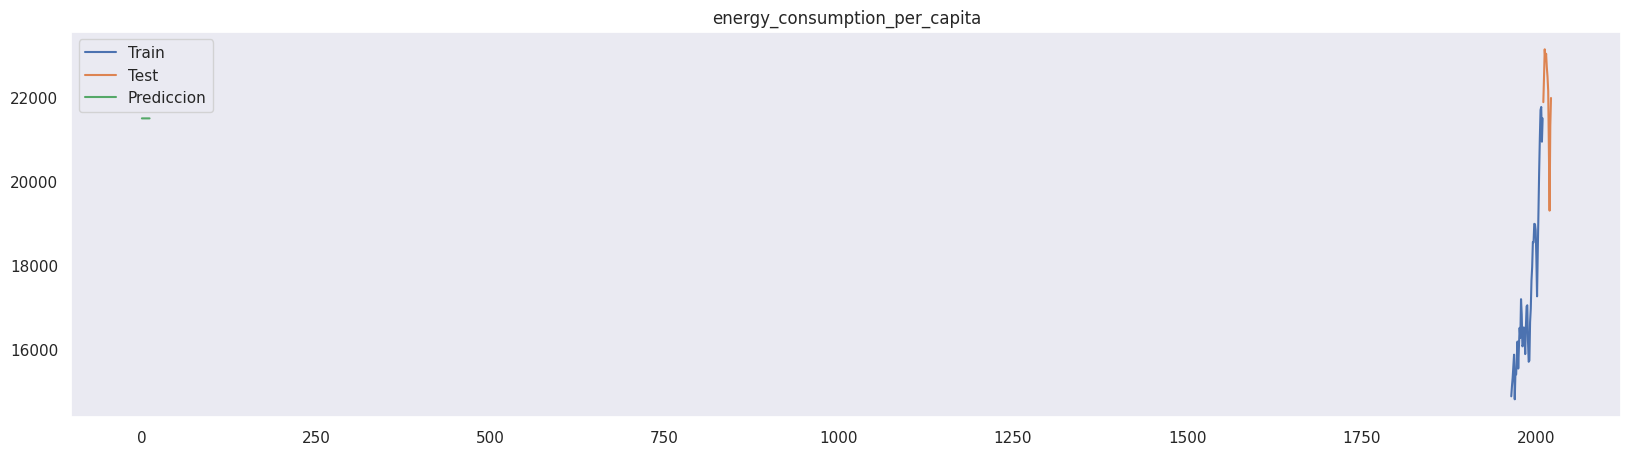

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['energy_consumption_per_capita'], label='Train')
plt.plot(test['energy_consumption_per_capita'], label='Test')
plt.plot(forecasted_values, label='Prediccion')
plt.legend(loc='best')
plt.title('energy_consumption_per_capita')
plt.show()

In [ ]:
forecasted_values

array([21509.24842531, 21509.25161473, 21509.25161473, 21509.25161473,
       21509.25161473, 21509.25161473, 21509.25161473, 21509.25161473,
       21509.25161473, 21509.25161473, 21509.25161473, 21509.25161473])

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat import lzip



# Ajustar un modelo de regresión simple (puede ser más complejo según tus necesidades)
X = da2['Year']  # Utiliza el índice de tiempo como variable independiente
y = da2['energy_consumption_per_capita']

# Ajustar el modelo de regresión
model = sm.OLS(y, X)
results = model.fit()

# Aplicar el test de Breusch-Pagan a los residuos
name = ['p-value']
test = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
resultados_test = lzip(name, test)

print(resultados_test)


ValueError: ignored

La interpretación del resultado del test se basa en el valor p asociado con la estadística de prueba. Un valor p pequeño (generalmente menor a 0.05) sugiere evidencia en contra de la hipótesis nula de homocedasticidad, indicando la presencia de heterocedasticidad

en este caso el test no rechaza indicando entonces presencia de homocedasticidad

In [ ]:
residuos=result_R2.resid

In [ ]:
import numpy as np
import statsmodels.api as sm

# Asumiendo que 'train_R2' es tu serie temporal de entrenamiento y 'exog_data' son tus variables exógenas
# Ajustar el modelo ARIMA
model_R2 = sm.tsa.arima.ARIMA(train_R2, order=(1, 1, 1))
result_R2 = model_R2.fit()

# Obtener los residuos del modelo
residuos = result_R2.resid

# Asumiendo que 'exog_data' es tu variable exógena
# Asegurarse de que exog_data esté definido (sustituir esto con tu propio conjunto de datos)
exog_data = ...

# Agregar una constante a las variables exógenas
exog_data_with_constant = sm.add_constant(exog_data)

# Aplicar el test de Breusch-Pagan a los residuos
nombre_prueba = ['Estadístico', 'Valor p', 'Estadístico F', 'Valor p F']
prueba_breusch_pagan = sm.stats.diagnostic.het_breuschpagan(residuos, exog_data_with_constant)

# Mostrar los resultados del test
list(zip(nombre_prueba, prueba_breusch_pagan))


TypeError: ignored